## Unemployment analysis using FRED's API 

In [45]:
# Installing FRED API
#!pip install fredapi;

### Importing libraries

In [46]:
# Standard libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# FRED API
from fredapi import Fred
# Graphing style
#plt.style.use('seaborn-colorblind')
plt.style.use('fivethirtyeight')
# Show all columns in pandas
pd.set_option('max_columns', 500)
# Importing color pallete from the theme used
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
# Importing fred API key
path = 'C:\\Users\\kevmi\\OneDrive\\Documentos\\Github Proyects\\API Keys\\FRED\\fred_api_key.txt'
with open(path, 'r') as f:
    lines = f.readlines()
fred_key = lines[0]

print('Import complete')

Import complete


### 1. Creating FRED object

In [47]:
fred = Fred(api_key=fred_key)
fred

### 2. Exploring economic data available

In [48]:
series = []

Unemployment results

In [49]:
unrate_search = fred.search('Unemployment', order_by='popularity')
series.append('UNRATE')
unrate_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2022-08-16,2022-08-16,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2022-07-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2022-08-10 07:38:02-05:00,94,The Consumer Price Index for All Urban Consume...
UNRATE,UNRATE,2022-08-16,2022-08-16,Unemployment Rate,1948-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:02-05:00,91,The unemployment rate represents the number of...
PAYEMS,PAYEMS,2022-08-16,2022-08-16,"All Employees, Total Nonfarm",1939-01-01,2022-07-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-08-05 07:45:02-05:00,82,"All Employees: Total Nonfarm, commonly known a..."
ICSA,ICSA,2022-08-16,2022-08-16,Initial Claims,1967-01-07,2022-08-06,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-08-11 07:33:01-05:00,80,An initial claim is a claim filed by an unempl...
CES0500000003,CES0500000003,2022-08-16,2022-08-16,"Average Hourly Earnings of All Employees, Tota...",2006-03-01,2022-07-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2022-08-05 07:45:02-05:00,76,The series comes from the 'Current Employment ...


Industrial Production results

In [50]:
indprod_search = fred.search('Industrial production', order_by='popularity')
series.append('INDPRO')
indprod_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
INDPRO,INDPRO,2022-08-16,2022-08-16,Industrial Production: Total Index,1919-01-01,2022-07-01,Monthly,M,Index 2017=100,Index 2017=100,Seasonally Adjusted,SA,2022-08-16 08:19:01-05:00,79,The Industrial Production Index (INDPRO) is an...
RECPROUSM156N,RECPROUSM156N,2022-08-16,2022-08-16,Smoothed U.S. Recession Probabilities,1967-06-01,2022-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-08-01 07:02:03-05:00,76,Smoothed recession probabilities for the Unite...
PCU32733273,PCU32733273,2022-08-16,2022-08-16,Producer Price Index by Industry: Cement and C...,2003-12-01,2022-07-01,Monthly,M,Index Dec 2003=100,Index Dec 2003=100,Not Seasonally Adjusted,NSA,2022-08-11 07:55:02-05:00,68,None
TCU,TCU,2022-08-16,2022-08-16,Capacity Utilization: Total Index,1967-01-01,2022-07-01,Monthly,M,Percent of Capacity,% of Capacity,Seasonally Adjusted,SA,2022-08-16 08:19:01-05:00,67,Capacity Utilization: Total Industry (TCU) is ...
OPHNFB,OPHNFB,2022-08-16,2022-08-16,Nonfarm Business Sector: Labor Productivity (O...,1947-01-01,2022-04-01,Quarterly,Q,Index 2012=100,Index 2012=100,Seasonally Adjusted,SA,2022-08-09 07:36:02-05:00,64,The Productivity and Costs release on August 7...


In [51]:
housing_search = fred.search('housing starts', order_by='popularity')
series.append('HOUST1F')
housing_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
HOUST,HOUST,2022-08-16,2022-08-16,New Privately-Owned Housing Units Started: Tot...,1959-01-01,2022-07-01,Monthly,M,Thousands of Units,Thous. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-08-16 07:31:02-05:00,79,"As provided by the Census, start occurs when e..."
PERMIT,PERMIT,2022-08-16,2022-08-16,New Privately-Owned Housing Units Authorized i...,1960-01-01,2022-07-01,Monthly,M,Thousands of Units,Thous. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-08-16 07:31:11-05:00,70,"Starting with the 2005-02-16 release, the seri..."
HOUST1F,HOUST1F,2022-08-16,2022-08-16,New Privately-Owned Housing Units Started: Sin...,1959-01-01,2022-07-01,Monthly,M,Thousands of Units,Thous. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-08-16 07:31:14-05:00,62,None
ATNHPIUS06037A,ATNHPIUS06037A,2022-08-16,2022-08-16,All-Transactions House Price Index for Los Ang...,1975-01-01,2021-01-01,Annual,A,Index 2000=100,Index 2000=100,Not Seasonally Adjusted,NSA,2022-03-29 09:02:03-05:00,55,"As stated by the source, these annual county i..."
HOUST5F,HOUST5F,2022-08-16,2022-08-16,New Privately-Owned Housing Units Started: Uni...,1959-01-01,2022-07-01,Monthly,M,Thousands of Units,Thous. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-08-16 07:31:16-05:00,47,"From January 1959 until July 1963, the 5 units..."


In [52]:
housing_search.loc['HOUST1F']['title']

'New Privately-Owned Housing Units Started: Single-Family Units'

In [53]:
retail_search = fred.search('retail sales', order_by='popularity')
series.append('RRSFS')
retail_search.head(7)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2022-08-16,2022-08-16,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2022-07-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2022-08-10 07:38:02-05:00,94,The Consumer Price Index for All Urban Consume...
TOTALSA,TOTALSA,2022-08-16,2022-08-16,Total Vehicle Sales,1976-01-01,2022-07-01,Monthly,M,Millions of Units,Mil. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-08-05 13:18:02-05:00,75,None
RSXFS,RSXFS,2022-08-16,2022-08-16,Advance Retail Sales: Retail Trade,1992-01-01,2022-06-01,Monthly,M,Millions of Dollars,Mil. of $,Seasonally Adjusted,SA,2022-07-15 07:34:01-05:00,71,E-commerce sales are included in the total mon...
RETAILIRSA,RETAILIRSA,2022-08-16,2022-08-16,Retailers: Inventories to Sales Ratio,1992-01-01,2022-05-01,"Monthly, End of Period",M,Ratio,Ratio,Seasonally Adjusted,SA,2022-07-15 09:01:01-05:00,68,The inventories to sales ratios show the relat...
ECOMPCTSA,ECOMPCTSA,2022-08-16,2022-08-16,E-Commerce Retail Sales as a Percent of Total ...,1999-10-01,2022-01-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2022-05-19 09:16:02-05:00,64,E-commerce sales are sales of goods and servic...
HTRUCKSSAAR,HTRUCKSSAAR,2022-08-16,2022-08-16,Motor Vehicle Retail Sales: Heavy Weight Trucks,1967-01-01,2022-07-01,Monthly,M,Millions of Units,Mil. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-08-05 13:18:05-05:00,61,"Heavy trucks are trucks with more than 14,000 ..."
RRSFS,RRSFS,2022-08-16,2022-08-16,Advance Real Retail and Food Services Sales,1992-01-01,2022-06-01,Monthly,M,Millions of 1982-84 CPI Adjusted Dollars,Mil. of 1982-84 CPI Adjusted $,Seasonally Adjusted,SA,2022-07-15 07:39:04-05:00,61,The data in this series are calculated using t...


In [54]:
retail_search.loc['RRSFS']['title']

'Advance Real Retail and Food Services Sales'

#### 2.1 Extracting relevant data

Function to extract dataframes

In [55]:
def get_series(series_names):
    datasets = {}
    # Generating dictionary 
    for name in series_names:
        frame = fred.get_series(series_id=name)
        datasets['df_'+str(name).lower()] = frame

        
    return datasets


Running function

In [56]:
datasets = get_series(series)
datasets.keys()

dict_keys(['df_unrate', 'df_indpro', 'df_houst1f', 'df_rrsfs'])

Creaitng dataframes

In [57]:
df_unrate = pd.DataFrame(datasets['df_unrate'], columns=['unemployment_rate'])
df_indpro = pd.DataFrame(datasets['df_indpro'], columns=['industrial_production'])
df_houst = pd.DataFrame(datasets['df_houst1f'], columns=['housing_starts'])
df_retail = pd.DataFrame(datasets['df_rrsfs'], columns=['retail_sales'])

In [58]:
df_indpro.head()

,industrial_production
1919-01-01,4.8773
1919-02-01,4.6617
1919-03-01,4.5270
1919-04-01,4.6078
1919-05-01,4.6348


#### 2.2 Extracting data by state

In [59]:
search_by_state = fred.search('unemployment by state', order_by='popularity')
search_by_state = search_by_state[(search_by_state['title'].str.contains('Unemployment Rate in')) & (search_by_state['units'] == 'Percent')
                     & (search_by_state['frequency_short'] == 'M') & (search_by_state['seasonal_adjustment_short'] == 'SA')]
# Dropping regions
search_by_state = search_by_state.drop(['CMWRUR', 'LASMT261982000000003', 'CNERUR', 'LASMT391746000000003', 'CWSTUR', 'CSOUUR', 'CNEWUR'])
search_by_state.shape

(52, 15)

In [60]:
# Extracting each dataset and joining them
all_results = []

for myid in search_by_state.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unrate_states = pd.concat(all_results, axis=1)

In [61]:
unrate_states

,CAUR,FLUR,TXUR,NYUR,OHUR,PAUR,MIUR,ALUR,MAUR,GAUR,WIUR,TNUR,VAUR,AZUR,WAUR,COUR,INUR,MOUR,OKUR,ARUR,SCUR,LAUR,UTUR,IAUR,WVUR,ILUR,NVUR,AKUR,MTUR,ORUR,NMUR,MDUR,MNUR,MSUR,DCUR,NDUR,NJUR,WYUR,NCUR,MEUR,IDUR,NEUR,CTUR,HIUR,KYUR,KSUR,DEUR,RIUR,SDUR,VTUR,NHUR,PRUR
1976-01-01,9.2,9.7,5.8,10.3,8.1,8.0,9.9,6.6,10.5,8.4,5.8,6.0,6.1,10.2,8.5,5.8,6.6,5.9,5.8,7.3,7.4,6.3,5.8,4.3,7.5,6.6,9.2,7.1,5.8,9.5,8.6,6.4,6.0,6.7,8.7,3.4,10.3,4.1,6.4,8.7,5.6,3.3,9.8,9.8,5.6,4.2,8.0,7.8,3.3,8.6,6.5,19.6
1976-02-01,9.2,9.7,5.8,10.3,8.1,8.1,9.9,6.6,10.5,8.4,5.8,6.0,6.1,10.2,8.5,5.7,6.6,5.9,5.8,7.3,7.4,6.3,5.9,4.3,7.5,6.6,9.2,7.1,5.8,9.5,8.7,6.4,6.0,6.7,8.7,3.4,10.3,4.1,6.4,8.7,5.6,3.3,9.8,9.8,5.6,4.2,8.0,7.8,3.3,8.6,6.5,19.5
1976-03-01,9.1,9.6,5.9,10.2,8.1,8.1,9.9,6.6,10.5,8.4,5.7,6.0,6.1,10.1,8.4,5.7,6.5,5.9,5.8,7.3,7.3,6.3,5.8,4.3,7.5,6.6,9.2,7.0,5.8,9.4,8.7,6.4,5.9,6.6,8.6,3.4,10.3,4.1,6.4,8.6,5.6,3.3,9.8,9.8,5.6,4.2,8.0,7.7,3.2,8.6,6.5,19.3
1976-04-01,9.1,9.5,5.9,10.2,8.0,8.1,9.8,6.5,10.3,8.3,5.6,6.0,6.0,10.0,8.5,5.6,6.3,6.0,5.8,7.2,7.2,6.4,5.8,4.2,7.5,6.6,9.0,6.9,5.8,9.2,8.6,6.4,5.8,6.4,8.5,3.5,10.3,4.0,6.3,8.6,5.6,3.2,9.6,9.7,5.6,4.2,8.1,7.7,3.1,8.6,6.5,19.0
1976-05-01,9.0,9.3,5.9,10.1,7.8,8.1,9.6,6.4,10.1,8.1,5.5,5.9,5.9,9.8,8.5,5.6,6.0,6.0,5.7,7.1,7.0,6.5,5.7,4.1,7.4,6.6,8.9,6.9,5.8,9.1,8.6,6.5,5.7,6.3,8.4,3.6,10.3,3.9,6.1,8.5,5.6,3.1,9.4,9.4,5.5,4.2,8.3,7.7,3.1,8.5,6.5,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,5.3,3.3,4.7,4.9,4.2,5.1,4.7,3.0,4.7,3.2,2.9,3.4,3.2,3.6,4.3,4.0,2.3,3.7,2.6,3.1,3.5,4.3,2.1,3.5,3.9,4.8,5.1,5.3,2.6,4.0,5.6,5.0,2.7,4.5,6.1,2.9,4.6,3.6,3.7,4.0,2.8,2.1,4.9,4.2,4.2,2.5,4.6,3.9,2.6,2.9,2.7,6.8
2022-03-01,4.8,3.2,4.4,4.6,4.1,4.9,4.4,2.9,4.3,3.1,2.8,3.2,3.0,3.3,4.1,3.7,2.2,3.6,2.7,3.1,3.4,4.2,2.0,3.3,3.7,4.7,5.0,4.9,2.3,3.8,5.3,4.6,2.5,4.2,6.0,2.9,4.2,3.4,3.5,3.6,2.7,2.0,4.6,4.1,4.0,2.4,4.5,3.4,2.5,2.6,2.4,6.5
2022-04-01,4.6,3.0,4.3,4.5,4.0,4.8,4.3,2.8,4.1,3.1,2.8,3.2,3.0,3.2,4.1,3.6,2.2,3.4,2.7,3.2,3.3,4.1,1.9,3.0,3.6,4.6,5.0,4.8,2.3,3.7,5.3,4.2,2.2,4.1,5.8,2.8,4.1,3.3,3.4,3.3,2.6,1.9,4.4,4.1,3.9,2.4,4.5,3.2,2.3,2.5,2.3,6.4
2022-05-01,4.3,2.9,4.2,4.4,3.9,4.6,4.3,2.7,3.9,3.0,2.9,3.3,3.0,3.2,3.9,3.5,2.2,3.1,2.8,3.2,3.3,4.0,2.0,2.7,3.5,4.6,4.9,4.6,2.4,3.5,5.1,4.0,2.0,3.9,5.7,2.6,3.9,3.2,3.4,3.2,2.5,1.9,4.2,4.1,3.8,2.3,4.5,2.9,2.3,2.3,2.1,6.2


In [62]:
# Replacing column title by name of the state
unrate_states = unrate_states.dropna()
id_to_state = search_by_state['title'].str.replace('Unemployment Rate in ','').to_dict()
unrate_states.columns = [id_to_state[c] for c in unrate_states.columns]
unrate_states.head()

,California,Florida,Texas,New York,Ohio,Pennsylvania,Michigan,Alabama,Massachusetts,Georgia,Wisconsin,Tennessee,Virginia,Arizona,Washington,Colorado,Indiana,Missouri,Oklahoma,Arkansas,South Carolina,Louisiana,Utah,Iowa,West Virginia,Illinois,Nevada,Alaska,Montana,Oregon,New Mexico,Maryland,Minnesota,Mississippi,the District of Columbia,North Dakota,New Jersey,Wyoming,North Carolina,Maine,Idaho,Nebraska,Connecticut,Hawaii,Kentucky,Kansas,Delaware,Rhode Island,South Dakota,Vermont,New Hampshire,Puerto Rico
1976-01-01,9.2,9.7,5.8,10.3,8.1,8.0,9.9,6.6,10.5,8.4,5.8,6.0,6.1,10.2,8.5,5.8,6.6,5.9,5.8,7.3,7.4,6.3,5.8,4.3,7.5,6.6,9.2,7.1,5.8,9.5,8.6,6.4,6.0,6.7,8.7,3.4,10.3,4.1,6.4,8.7,5.6,3.3,9.8,9.8,5.6,4.2,8.0,7.8,3.3,8.6,6.5,19.6
1976-02-01,9.2,9.7,5.8,10.3,8.1,8.1,9.9,6.6,10.5,8.4,5.8,6.0,6.1,10.2,8.5,5.7,6.6,5.9,5.8,7.3,7.4,6.3,5.9,4.3,7.5,6.6,9.2,7.1,5.8,9.5,8.7,6.4,6.0,6.7,8.7,3.4,10.3,4.1,6.4,8.7,5.6,3.3,9.8,9.8,5.6,4.2,8.0,7.8,3.3,8.6,6.5,19.5
1976-03-01,9.1,9.6,5.9,10.2,8.1,8.1,9.9,6.6,10.5,8.4,5.7,6.0,6.1,10.1,8.4,5.7,6.5,5.9,5.8,7.3,7.3,6.3,5.8,4.3,7.5,6.6,9.2,7.0,5.8,9.4,8.7,6.4,5.9,6.6,8.6,3.4,10.3,4.1,6.4,8.6,5.6,3.3,9.8,9.8,5.6,4.2,8.0,7.7,3.2,8.6,6.5,19.3
1976-04-01,9.1,9.5,5.9,10.2,8.0,8.1,9.8,6.5,10.3,8.3,5.6,6.0,6.0,10.0,8.5,5.6,6.3,6.0,5.8,7.2,7.2,6.4,5.8,4.2,7.5,6.6,9.0,6.9,5.8,9.2,8.6,6.4,5.8,6.4,8.5,3.5,10.3,4.0,6.3,8.6,5.6,3.2,9.6,9.7,5.6,4.2,8.1,7.7,3.1,8.6,6.5,19.0
1976-05-01,9.0,9.3,5.9,10.1,7.8,8.1,9.6,6.4,10.1,8.1,5.5,5.9,5.9,9.8,8.5,5.6,6.0,6.0,5.7,7.1,7.0,6.5,5.7,4.1,7.4,6.6,8.9,6.9,5.8,9.1,8.6,6.5,5.7,6.3,8.4,3.6,10.3,3.9,6.1,8.5,5.6,3.1,9.4,9.4,5.5,4.2,8.3,7.7,3.1,8.5,6.5,18.9


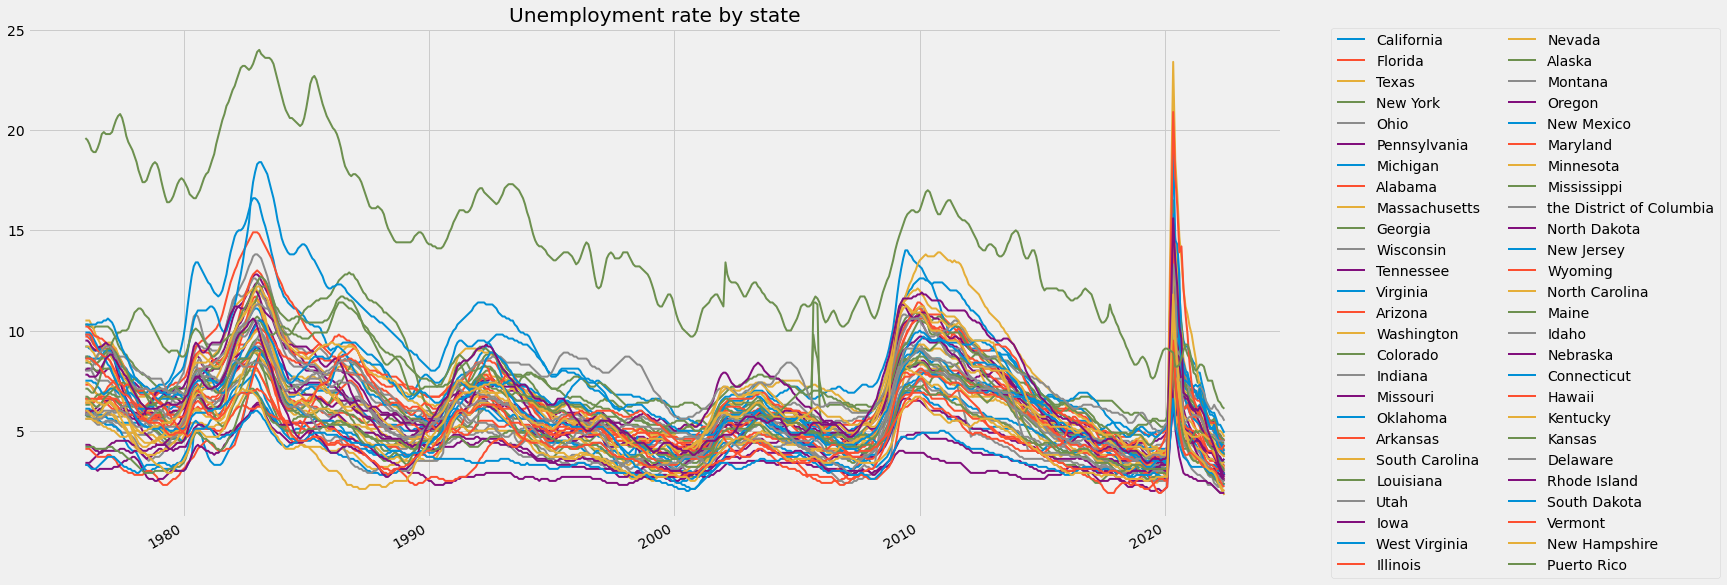

In [63]:
unrate_states.plot(figsize=(20,10), 
            title='Unemployment rate by state', lw=2)
l1 = plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0, ncol=2)

# px.line(unrate_states)

### 3. Joining variables

<AxesSubplot:label='7077f1f9-c6fc-499b-a013-016b5d3871a3'>

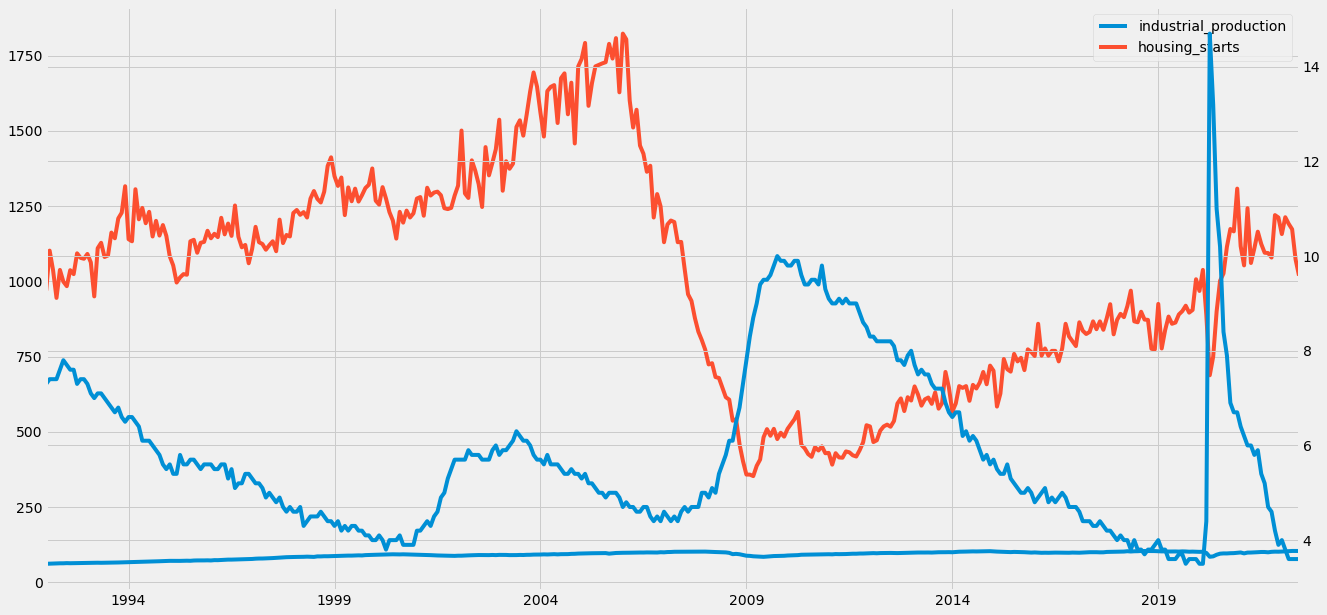

In [64]:
merged_df = pd.merge(df_indpro, df_retail, how='inner', left_index=True, right_index=True)
merged_df = pd.merge(merged_df, df_houst, how='inner', left_index=True, right_index=True)
merged_df = pd.merge(merged_df, df_unrate, how='inner', left_index=True, right_index=True)

fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
merged_df[['industrial_production', 'housing_starts']].plot(ax=ax, 
            label=['industrial_production', 'housing_starts'])
merged_df['unemployment_rate'].plot(ax=ax2, label='Unemployment rate')


In [65]:
# Creating color palette
colors = ['silver', 'violet', 'coral', 'darkcyan']
color_dict = {}
i = 0
for c in merged_df.columns:
    color_dict[c] = colors[i]
    i+=1
color_dict

{'industrial_production': 'silver',
 'retail_sales': 'violet',
 'housing_starts': 'coral',
 'unemployment_rate': 'darkcyan'}

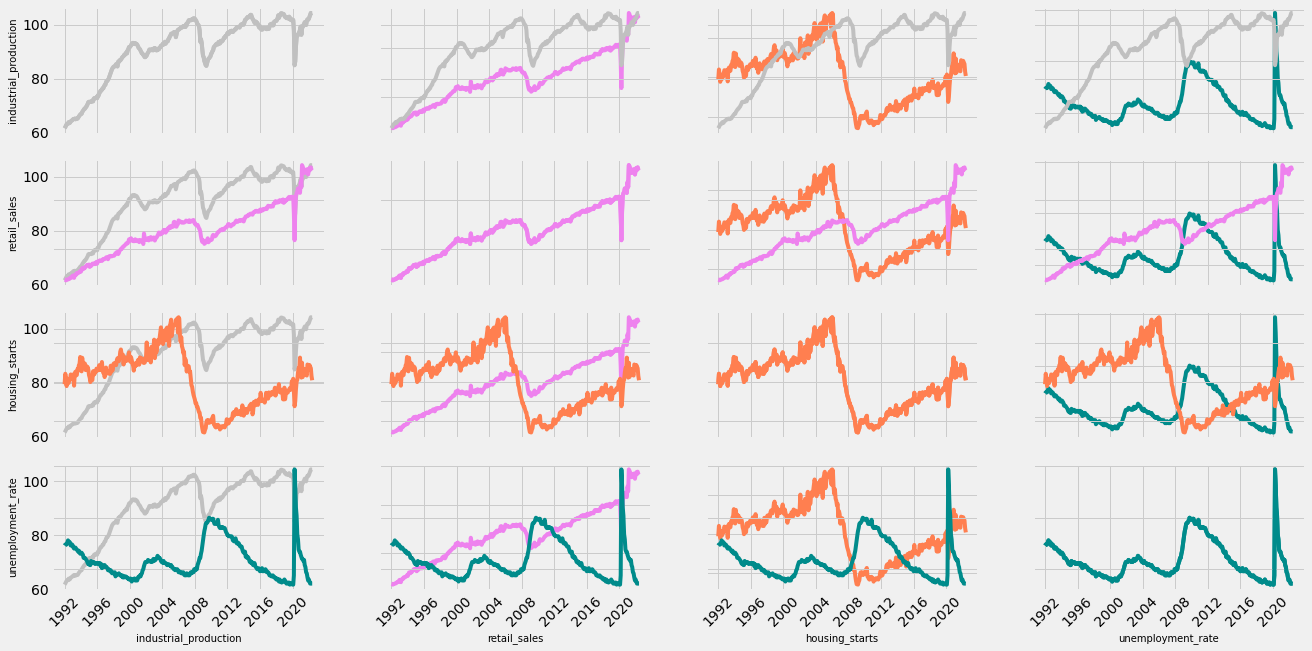

In [66]:
fig, ax = plt.subplots(4,4, sharex=True, figsize=(20,10))
row = 0
col = 0
for index1 in merged_df.columns:
    col = 0
    for index2 in merged_df:
        ax[row][col].plot(merged_df[index2], color_dict[index2])
        ax[row][col].tick_params(axis = 'x', labelrotation=45)
        ax[row][col].tick_params(left=False, right=False, labelleft=False)

        ax2 = ax[row][col].twinx()
        ax2.plot(merged_df[index1], color=color_dict[index1])
        ax2.tick_params(left=False, right=False, labelleft=False, labelright=False)

        if row==3:
            ax[row][col].set_xlabel(index2, fontsize=10)
            ax[row][col].tick_params(axis = 'x', labelrotation=45)
        if col==0:
            ax[row][col].set_ylabel(index1, fontsize=10)
            ax[row][col].tick_params(axis = 'y', labelleft=True)
        col+=1
        if row > 3: break
    row+=1

### 4. Computing moving totals and averages

Function that computes 3 and 12 MMT or MMA

In [68]:
def n_month_moving_agg(df, n = 3, agg = 'total'):
    """
    This is a function that computes the n_month_moving_total or n_month_moving_average.\n
    Parameters
    -----------------\n
  
    df : a dataframe with only one column containing the variable you want to compute
    n : the number of periods to aggregate (i.e n = 3 computes the 3MMT or 3MMA)
    agg : the type of aggregation to compute. Expects an input from ['total, 'avg]

    """
    # Converting input into a df in case a series is introduced
    df = pd.DataFrame(df)
    column_name = df.columns[0]
    total = []
    
    for x in range(len(df.index)):
        elements = []
        if x <= n-2: 
            total.append(np.nan)
        else: 
            for y in range(n): 
                elements.append(df.iloc[x - y][column_name])
            if agg == 'total':
                total.append(np.sum(elements))
                new_col_name = str(n) + 'MMT'
            elif agg == 'avg':
                total.append(np.average(elements))
                new_col_name = str(n) + 'MMA'
            
    df[new_col_name] = total
    
    return df[new_col_name]

In [69]:
for c in merged_df.columns:
    if c != 'unemployment_rate':
        merged_df[c + '_3MMT'] = n_month_moving_agg(merged_df[c], n=3, agg='total')
        merged_df[c + '_12MMT'] = n_month_moving_agg(merged_df[c], n=12, agg='total')
    else:
        merged_df[c + '_3MMA'] = n_month_moving_agg(merged_df[c], n=3, agg='avg')
        merged_df[c + '_12MMA'] = n_month_moving_agg(merged_df[c], n=12, agg='avg')
    

In [70]:
merged_df

,industrial_production,retail_sales,housing_starts,unemployment_rate,industrial_production_3MMT,industrial_production_12MMT,retail_sales_3MMT,retail_sales_12MMT,housing_starts_3MMT,housing_starts_12MMT,unemployment_rate_3MMA,unemployment_rate_12MMA
1992-01-01,61.6471,118651.0,969.0,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-02-01,62.0794,118480.0,1102.0,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-03-01,62.5955,117700.0,1037.0,7.4,186.3220,NaN,354831.0,NaN,3108.0,NaN,7.366667,NaN
1992-04-01,63.0726,118156.0,945.0,7.4,187.7475,NaN,354336.0,NaN,3084.0,NaN,7.400000,NaN
1992-05-01,63.2761,118548.0,1038.0,7.6,188.9442,NaN,354404.0,NaN,3020.0,NaN,7.466667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,102.8987,233062.0,1213.0,3.8,306.8034,1209.5413,690632.0,2775005.0,3582.0,13773.0,3.900000,4.958333
2022-03-01,103.6218,232860.0,1191.0,3.6,308.6665,1214.3010,697025.0,2771765.0,3561.0,13721.0,3.800000,4.758333
2022-04-01,104.3022,233739.0,1173.0,3.6,310.8227,1219.5786,699661.0,2770896.0,3577.0,13833.0,3.666667,4.558333
2022-05-01,104.2103,231188.0,1073.0,3.6,312.1343,1224.0104,697787.0,2770169.0,3437.0,13796.0,3.600000,4.375000


### 5. Computing rates of change

Function that creates rates of change

In [71]:
def ROC(df, n = 3):
    """
    This is a function that computes the rate of change of a variable
    """
    # Converting input into a df in case a series is introduced
    df = pd.DataFrame(df)
    column_name = df.columns[0]
    roc_series = []
    
    for x in range(len(df.index)):
        if x <= n-2 + 12: 
            roc_series.append(np.nan)
        else: 
            roc = (df.iloc[x][column_name] / df.iloc[x-12][column_name]) - 1
            roc_series.append(roc)
            
    df['roc'] = roc_series
    
    return df['roc']

In [72]:
merged_df['industrial_production_3MMT_ROC'] = ROC(merged_df['industrial_production_3MMT'])
merged_df.head(20)

,industrial_production,retail_sales,housing_starts,unemployment_rate,industrial_production_3MMT,industrial_production_12MMT,retail_sales_3MMT,retail_sales_12MMT,housing_starts_3MMT,housing_starts_12MMT,unemployment_rate_3MMA,unemployment_rate_12MMA,industrial_production_3MMT_ROC
1992-01-01,61.6471,118651.0,969.0,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-02-01,62.0794,118480.0,1102.0,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-03-01,62.5955,117700.0,1037.0,7.4,186.3220,NaN,354831.0,NaN,3108.0,NaN,7.366667,NaN,NaN
1992-04-01,63.0726,118156.0,945.0,7.4,187.7475,NaN,354336.0,NaN,3084.0,NaN,7.400000,NaN,NaN
1992-05-01,63.2761,118548.0,1038.0,7.6,188.9442,NaN,354404.0,NaN,3020.0,NaN,7.466667,NaN,NaN
1992-06-01,63.3102,118542.0,999.0,7.8,189.6589,NaN,355246.0,NaN,2982.0,NaN,7.600000,NaN,NaN
1992-07-01,63.8769,119044.0,984.0,7.7,190.4632,NaN,356134.0,NaN,3021.0,NaN,7.700000,NaN,NaN
1992-08-01,63.5221,119176.0,1037.0,7.6,190.7092,NaN,356762.0,NaN,3020.0,NaN,7.700000,NaN,NaN
1992-09-01,63.7217,120057.0,1024.0,7.6,191.1207,NaN,358277.0,NaN,3045.0,NaN,7.633333,NaN,NaN
1992-10-01,64.1556,120413.0,1093.0,7.3,191.3994,NaN,359646.0,NaN,3154.0,NaN,7.500000,NaN,NaN


In [80]:
# Applying function
import regex as re

for c in merged_df.columns[4:]:
    if '3MM' in c:
        merged_df[c + '_ROC'] = ROC(merged_df[c], n=3)
    elif '12MM' in c:
        merged_df[c + '_ROC'] = ROC(merged_df[c], n=12)


merged_df.head(30)

industrial_production_3MMT 3
retail_sales_3MMT 3
housing_starts_3MMT 3
unemployment_rate_3MMA 3
industrial_production_3MMT_ROC 3


,industrial_production,retail_sales,housing_starts,unemployment_rate,industrial_production_3MMT,industrial_production_12MMT,retail_sales_3MMT,retail_sales_12MMT,housing_starts_3MMT,housing_starts_12MMT,unemployment_rate_3MMA,unemployment_rate_12MMA,industrial_production_3MMT_ROC,industrial_production_12MMT_ROC,retail_sales_3MMT_ROC,retail_sales_12MMT_ROC,housing_starts_3MMT_ROC,housing_starts_12MMT_ROC,unemployment_rate_3MMA_ROC,unemployment_rate_12MMA_ROC,industrial_production_3MMT_ROC_ROC
1992-01-01,61.6471,118651.0,969.0,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-02-01,62.0794,118480.0,1102.0,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-03-01,62.5955,117700.0,1037.0,7.4,186.3220,NaN,354831.0,NaN,3108.0,NaN,7.366667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-04-01,63.0726,118156.0,945.0,7.4,187.7475,NaN,354336.0,NaN,3084.0,NaN,7.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-01,63.2761,118548.0,1038.0,7.6,188.9442,NaN,354404.0,NaN,3020.0,NaN,7.466667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-01,63.3102,118542.0,999.0,7.8,189.6589,NaN,355246.0,NaN,2982.0,NaN,7.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-01,63.8769,119044.0,984.0,7.7,190.4632,NaN,356134.0,NaN,3021.0,NaN,7.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-01,63.5221,119176.0,1037.0,7.6,190.7092,NaN,356762.0,NaN,3020.0,NaN,7.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-01,63.7217,120057.0,1024.0,7.6,191.1207,NaN,358277.0,NaN,3045.0,NaN,7.633333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-10-01,64.1556,120413.0,1093.0,7.3,191.3994,NaN,359646.0,NaN,3154.0,NaN,7.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plotting rates of change

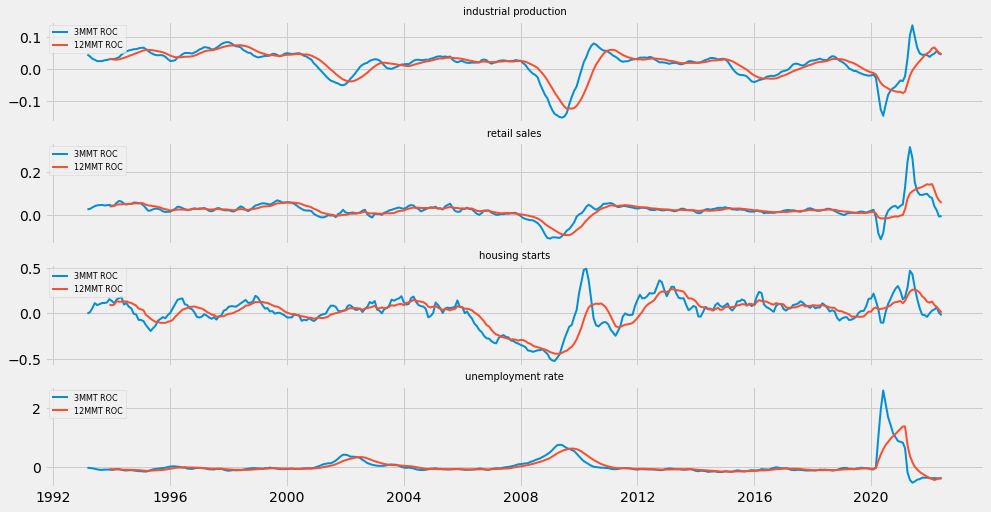

In [122]:
# Selecting only ROC columns
roc_cols = ['industrial_production_3MMT_ROC', 'industrial_production_12MMT_ROC',
       'retail_sales_3MMT_ROC', 'retail_sales_12MMT_ROC',
       'housing_starts_3MMT_ROC', 'housing_starts_12MMT_ROC',
       'unemployment_rate_3MMA_ROC', 'unemployment_rate_12MMA_ROC']
# Plotting
fig, ax = plt.subplots(4,1, figsize=(15,8), sharex=True)

row = 0
for r in range(0, len(roc_cols), 2):
    ax[row].plot(merged_df[roc_cols[r]], lw=2, label='3MMT ROC')
    ax[row].plot(merged_df[roc_cols[r+1]], lw=2, label='12MMT ROC')
    ax[row].set_title(' '.join(roc_cols[r].split('_')[0:2]), fontsize=10)
    ax[row].legend(loc='upper left', fontsize=8)

    row+=1

<AxesSubplot:title={'center':'ROC Correlation heatmap'}>

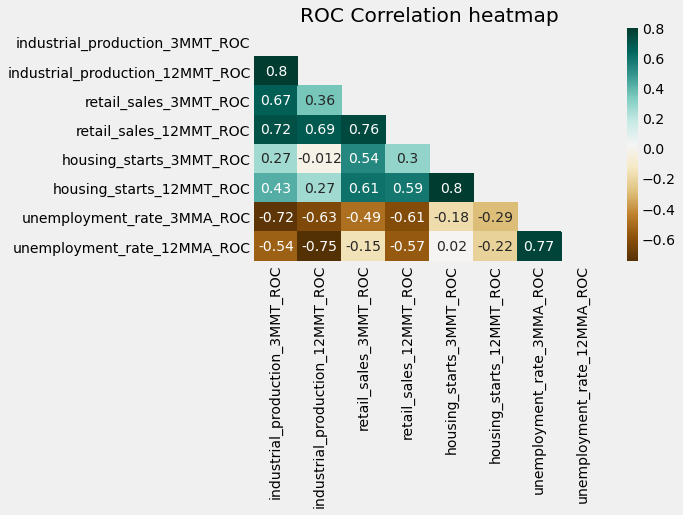

In [145]:
plt.figure(figsize=(7,4))
plt.title('ROC Correlation heatmap')

mask = np.triu(np.ones_like(merged_df[roc_cols].corr(), dtype=np.bool))


sns.heatmap(merged_df[roc_cols].corr(), annot=True, cmap='BrBG', mask=mask)

